# reference : https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning/data

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import csv

# ML_Prepocessing

### Read Data

In [2]:
path ='/home/fajrin/Machine learning journey/Pr1_heart dieases/heart.csv'
df = pd.read_csv(path)

### Introduce Data

In [3]:
display(df.head(5))
print(df.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Exploration

In [5]:
# handling missing data

df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

/home/fajrin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'Frequency')

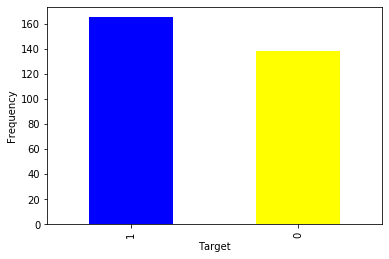

In [6]:
# Target

df.target.value_counts().plot(kind='bar', colors = ['blue' ,'yellow'])
plt.xlabel('Target')
plt.ylabel('Frequency')

percentage of patient have heart disease 54.46%
percentage of patient have not heart disease 45.54%


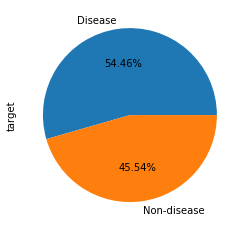

In [7]:
countNondisease = sum(df.target==0)
countdisease = sum(df.target==1)
print('percentage of patient have heart disease {:0.2f}%'.format((countdisease/df.target.shape[0])*100))
print('percentage of patient have not heart disease {:0.2f}%'.format((countNondisease/df.target.shape[0])*100))
df.target.value_counts().plot(kind='pie' ,autopct='%.2f%%' , labels=['Disease' ,'Non-disease'])

Text(0.5, 0, 'age based on gender')

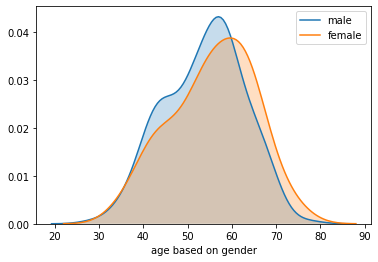

In [8]:
# SEX
ax = sns.kdeplot(df[df.sex==1].age,shade=True, label='male')
sns.kdeplot(df[df.sex==0].age ,shade = True , label='female')
plt.xlabel('age based on gender')

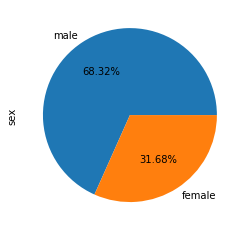

In [9]:
df.sex.value_counts().plot(kind='pie' , autopct = '%.2f%%' , labels=['male' ,'female'])

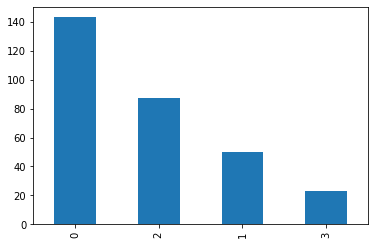

In [10]:
# CP

df.cp.value_counts().plot(kind='bar')

In [11]:
df['cp'].groupby(by = df.target).value_counts()

target  cp
0       0     104
        2      18
        1       9
        3       7
1       2      69
        1      41
        0      39
        3      16
Name: cp, dtype: int64

Text(0, 0.5, 'Frequency')

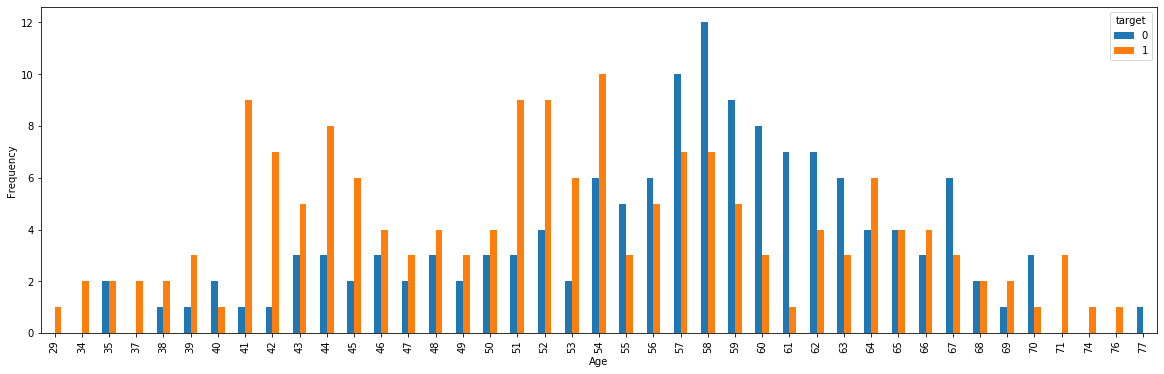

In [12]:
pd.crosstab(df.age , df.target).plot(kind='bar' , figsize = (20,6))
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Maximun heart rated')

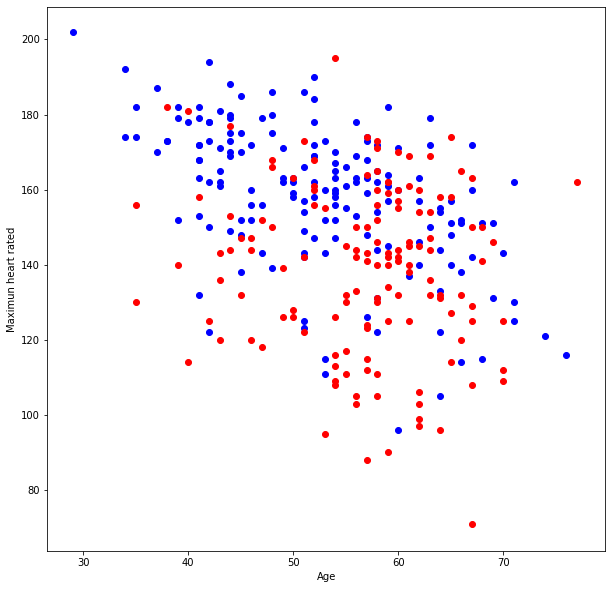

In [13]:
plt.figure(figsize=[10,10])
plt.scatter(x=df.age[df.target==1] ,y = df.thalach[df.target==1] , color = 'blue')
plt.scatter(x=df.age[df.target==0] , y =df.thalach[df.target==0] ,color = 'red')
plt.xlabel('Age')
plt.ylabel('Maximun heart rated')

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Make dummies variable

In [15]:
a = pd.get_dummies(df.cp , prefix = 'cp')
b = pd.get_dummies(df.thal , prefix = 'thal')
c = pd.get_dummies(df.slope , prefix = 'slope')

In [16]:
frames = [ df, a, b,c]
df = pd.concat(frames, axis =1)

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,0,0,0,1,0,1,0


# Logistic Regression

In [18]:
# make split data train and test
y = df.target.values
x_data= df.drop (labels='target' ,axis =1)
x_data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1


### from sklearn

In [19]:
# from sklearn
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()


In [20]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [21]:
x_norm = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x_norm.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(x_norm,y , test_size = 0.3 , random_state=42)

In [23]:
log.fit(X_train , y_train)

/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
log.score(X_train , y_train)

0.8726415094339622

In [25]:
def sigmoid(x):
    return 1 / (1+np.e**(-x))

In [26]:
y = np.linspace(0,1,5)
x = np.linspace(-10,10,20)

In [27]:
x

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

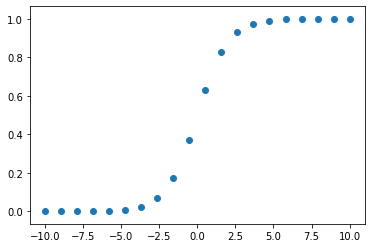

In [28]:
plt.scatter(x , sigmoid(x))

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
a = np.array([[1,2,3],[1,6,7] ,[2,2,2]])
b = np.array([[1,2],[2,3],[4,6]])

In [31]:
np.dot(a,b)

array([[17, 26],
       [41, 62],
       [14, 22]])

In [32]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,1,0,0,0,1,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,0,0,0,1,0,1,0


In [36]:
y_target = df['target']
x_features = df.drop('target' , axis =1 )

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [41]:
from sklearn.model_selection import KFold , cross_val_score

In [43]:
kf = KFold(n_splits = 3)
(cross_val_score(model , x_features , y_target)).mean()

/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8283828382838284

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train , X_test , y_train , y_test = train_test_split (x_features , y_target ,test_size = 0.3)

In [68]:
model.fit(X_train , y_train)

/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
model.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1])

In [70]:
model.score(X_train , y_train)

0.8632075471698113

In [83]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score,auc , roc_curve

In [84]:
cf = confusion_matrix(y_train , model.predict(X_train))

In [85]:
pd.DataFrame(cf)

,0,1
0,78,17
1,12,105


In [86]:
pc = precision_score(y_train , model.predict(X_train))

In [87]:
roc_auc_score(y_train , model.predict(X_train))

0.8592442645074224

In [88]:
y_score =model.decision_function(X_test)

In [114]:
logit_fpr , logit_tpr ,logit_threshold = roc_curve(y_test , y_score)
logit_auc = auc(logit_fpr, logit_tpr)

In [115]:
from sklearn.svm import LinearSVC

In [116]:
model2  = LinearSVC()
model2.fit(X_train , y_train)
y_score2=model2.decision_function(X_test)

/home/fajrin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [117]:
svc_fpr , svc_tpr , svc_threshold = roc_curve(y_test, y_score2)
svc_auc = auc(svc_fpr , svc_tpr)

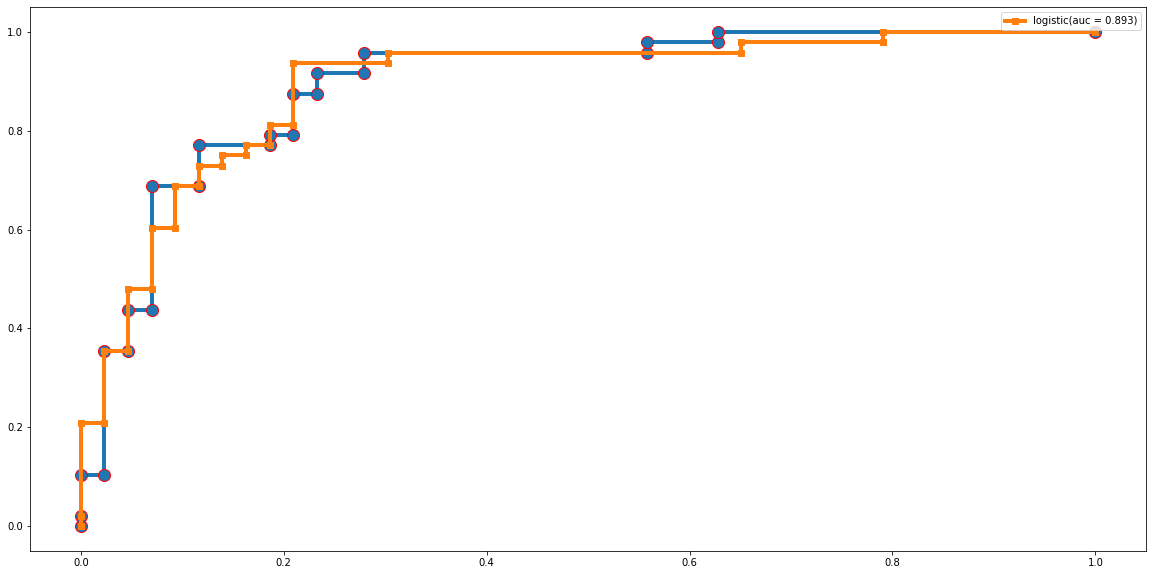

In [120]:
plt.figure(figsize=[20,10])
plt.plot(svc_fpr, svc_tpr , linewidth =4 ,marker='o' , markersize=12 , mec ='red')
plt.plot(logit_fpr , logit_tpr , linewidth = 4 ,marker='s' , label='logistic(auc = %0.3f)' %logit_auc)

plt.legend()